# Exercise: 
1, Create a dataframe of passes which contains all the passes in the match

2, Plot the start point of every Sweden pass. Attacking left to right.

3, Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)

4, Plot arrows to show where the passes we

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Size of the pitch in yards ( statsBomb uses yard )

pitchLengthX=120
pitchWidthY=80

#ID for England vs Sweden Womens World Cup

match_id_required = 69301
home_team_required ="England Women's"
away_team_required ="Sweden Women's"

In [3]:
# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name=str(match_id_required)+'.json'

#Load in all match events 
    # shots (start, end coordinates)
    # passes (start, end coordiantes)
import json
with open('Statsbomb/data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])



/var/folders/8h/_z683mw55k5czf35srs0p76c0000gn/T/ipykernel_26188/420746399.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])


In [22]:
#Taking a look at the columns in df

list(df.keys())

# df['type_name'] == 'Pass'

['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'possession',
 'duration',
 'type_id',
 'type_name',
 'possession_team_id',
 'possession_team_name',
 'play_pattern_id',
 'play_pattern_name',
 'team_id',
 'team_name',
 'tactics_formation',
 'tactics_lineup',
 'related_events',
 'location',
 'player_id',
 'player_name',
 'position_id',
 'position_name',
 'pass_recipient_id',
 'pass_recipient_name',
 'pass_length',
 'pass_angle',
 'pass_height_id',
 'pass_height_name',
 'pass_end_location',
 'pass_body_part_id',
 'pass_body_part_name',
 'pass_type_id',
 'pass_type_name',
 'under_pressure',
 'carry_end_location',
 'pass_outcome_id',
 'pass_outcome_name',
 'ball_receipt_outcome_id',
 'ball_receipt_outcome_name',
 'out',
 'clearance_left_foot',
 'clearance_body_part_id',
 'clearance_body_part_name',
 'duel_type_id',
 'duel_type_name',
 'duel_outcome_id',
 'duel_outcome_name',
 'counterpress',
 'pass_deflected',
 'dribble_outcome_id',
 'dribble_outcome_name',
 'pass_switch',


In [19]:
#passes dataframe created
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')

passes.head()


,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,pass_straight,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name,match_id
id,,,,,,,,,,,,,,,,,,,,,
760528a6-2de2-427f-9795-b2b19819ef1f,5,1,00:00:00.140,0,0,2,0.168730,30,Pass,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
ecec23b8-f03d-4bee-80df-9fabec558187,9,1,00:00:05.143,0,5,2,1.173625,30,Pass,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
bdedb943-ddac-42ab-bc8b-756faa49d9e6,12,1,00:00:07.844,0,7,2,1.019100,30,Pass,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
456a1ae6-1fe8-4ffc-952b-152a7f89e1d2,15,1,00:00:10.586,0,10,2,0.700000,30,Pass,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
a8d0155f-260c-4470-b842-b474ea58ffa7,19,1,00:00:11.326,0,11,2,4.150000,30,Pass,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301


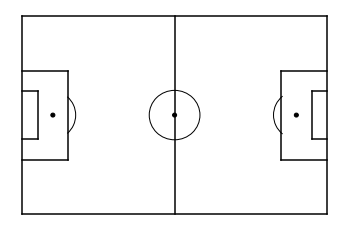

In [37]:
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','black')


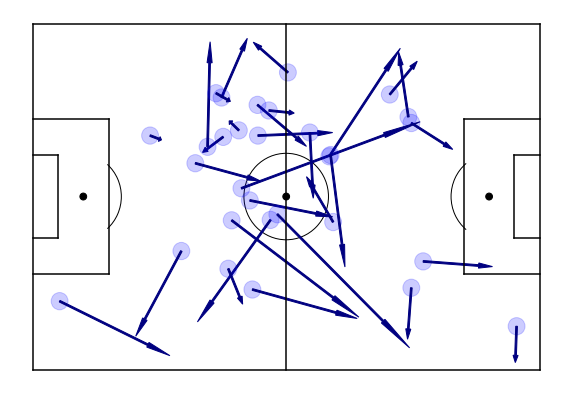

In [41]:
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','black')

def plotDiagram():
     for i, thepass in passes.iterrows():
        if thepass['player_name']=='Sara Caroline Seger':
            x=thepass['location'][0]
            y=thepass['location'][1]
            passCircle=plt.Circle((x,pitchWidthY-y),2,color="blue")      
            passCircle.set_alpha(.2)   
            # add into plot
            ax.add_patch(passCircle)


            dx=thepass['pass_end_location'][0] - x
            dy=thepass['pass_end_location'][1] - y #take note if plots go out of pitch

            passArrow = plt.Arrow(x, pitchWidthY-y, dx, -dy, width = 2, color = "navy")
            # add into plot
            ax.add_patch(passArrow)
            # title = plt.title(f'{thepass['player_name']}\'s passes')
    
plotDiagram()
fig.set_size_inches(10, 7)
fig.savefig('Output/passes.pdf', dpi=100) 
plt.show()

